In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.metrics import mean_squared_error , r2_score

In [13]:
fish_data = pd.read_csv("Fish.csv")
fish_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [14]:
X = fish_data[["Species","Length1","Length2","Length3","Height","Width"]]
y = fish_data["Weight"]
X = pd.get_dummies(X,columns = ["Species"],drop_first = True)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


model_ridge = Ridge(alpha=1)
model_ridge.fit(X_train,y_train)
y_pred = model_ridge.predict(X_test)

In [15]:
coeff_model = model_ridge.coef_
intercept = model_ridge.intercept_
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(coeff_model)
print(intercept)
print(mse)
print(r2)



[ -24.60005396   47.29985758    9.38053274    0.39645102   20.97188012
   61.37183339   14.92161687 -237.93376511   -3.59154699  232.99216846
    6.86483245]
-699.7903540810798
7455.81500236651
0.9475825900971633


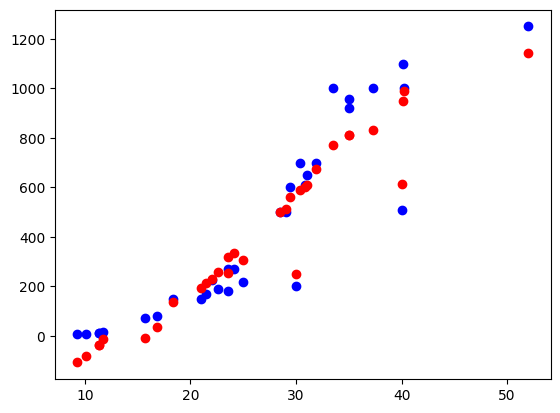

In [18]:
import matplotlib.pyplot as plt
plt.scatter(X_test["Length1"],y_test,color="blue")
plt.scatter(X_test["Length1"],y_pred,color="red")
